# Projekt z MI

W tym notebooku przeprowadzona została wstępna analiza otrzymanych danych. Dokonany został podział danych na wejścia i wyjścia oraz została obliczona korelacja pomiędzy poszczególnymi wejściami i wyjściami.

### Zaimportuj potrzebne biblioteki

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(mpl.__version__))
print("seabor version: {}".format(sns.__version__))

pandas version: 1.0.1
numpy version: 1.18.2
matplotlib version: 3.2.0
seabor version: 0.10.0


### Wczytaj dane

In [3]:
df = pd.read_excel("./data/K-1_MI.xlsx", sheet_name="d2", verbose=True)
df["date"] = pd.to_datetime(df["date"])

outputNames = ["O2A", "O2B", "TS1", "TS2", "TS05", "TW02", "TW04"]
outputs = df[outputNames]

modeledOutputs = ["LT01", "DP"]

inputs = df.drop(outputNames, axis=1)
inputs.head()

Reading sheet d2


,date,FP05,LT1,LT2,LT3,LT4,TMA,TMB,TMC,TMD,...,FW02,TTWS,PTWS,TW01,FW03,TW03,FW04,TTWT,PTWT,PPW
0,2014-07-06 15:30:10,1068.9575,21.4107,11.6199,11.714,18.8643,43.8947,76.1302,75.8843,74.866,...,3.0297,179.844,19.3311,301.2129,9.4894,290.8920,14.2998,177.7786,10.3202,3.5039
1,2014-07-06 15:30:20,1068.9575,21.4107,11.6199,11.714,18.8643,43.8947,76.1302,75.8843,74.866,...,3.0297,179.844,19.3311,301.2129,9.4894,290.8920,14.2998,177.7786,10.3202,3.5039
2,2014-07-06 15:30:30,1068.9575,21.4107,11.6199,11.714,18.8643,43.8947,76.1302,75.8843,74.866,...,3.0297,179.844,19.3147,301.2129,9.4894,292.1826,14.2998,177.7786,10.3202,3.4937
3,2014-07-06 15:30:40,1068.9575,21.4107,11.6199,11.714,18.8643,43.8947,76.1302,75.8843,74.866,...,3.0297,179.844,19.3298,302.4265,9.4894,292.1826,14.2998,177.7786,10.3202,3.4937
4,2014-07-06 15:30:50,1068.9575,21.4107,11.6199,11.714,18.8643,43.8947,76.1302,75.8843,74.866,...,3.1555,179.844,19.3298,302.4265,9.4894,292.1826,14.2998,177.7786,10.3202,3.4937



### Przykładowe wykresy

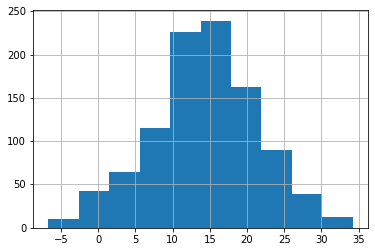

In [9]:
df["LT01"].hist()

#### Wykres przepływu wody wtryskowej (strona R) od czasu

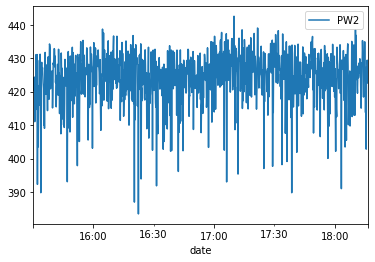

In [35]:
df.plot(x="date", y="PW2")

#### Wykres ciśnienia pary wodnej w walczaku od poziomu wody w walczaku

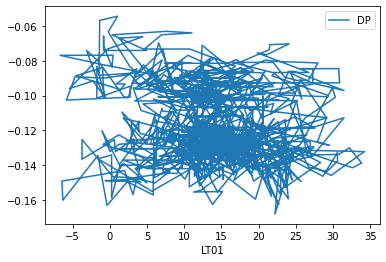

In [33]:
df.plot(x="LT01", y="DP")

#### Wykres zawartości tlenu w spalinach (strona A) od przepływu powietrza pierwotnego

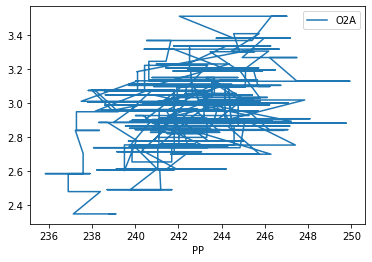

In [5]:
df.plot(x="PP", y="O2A")

### Korelacja zmiennych

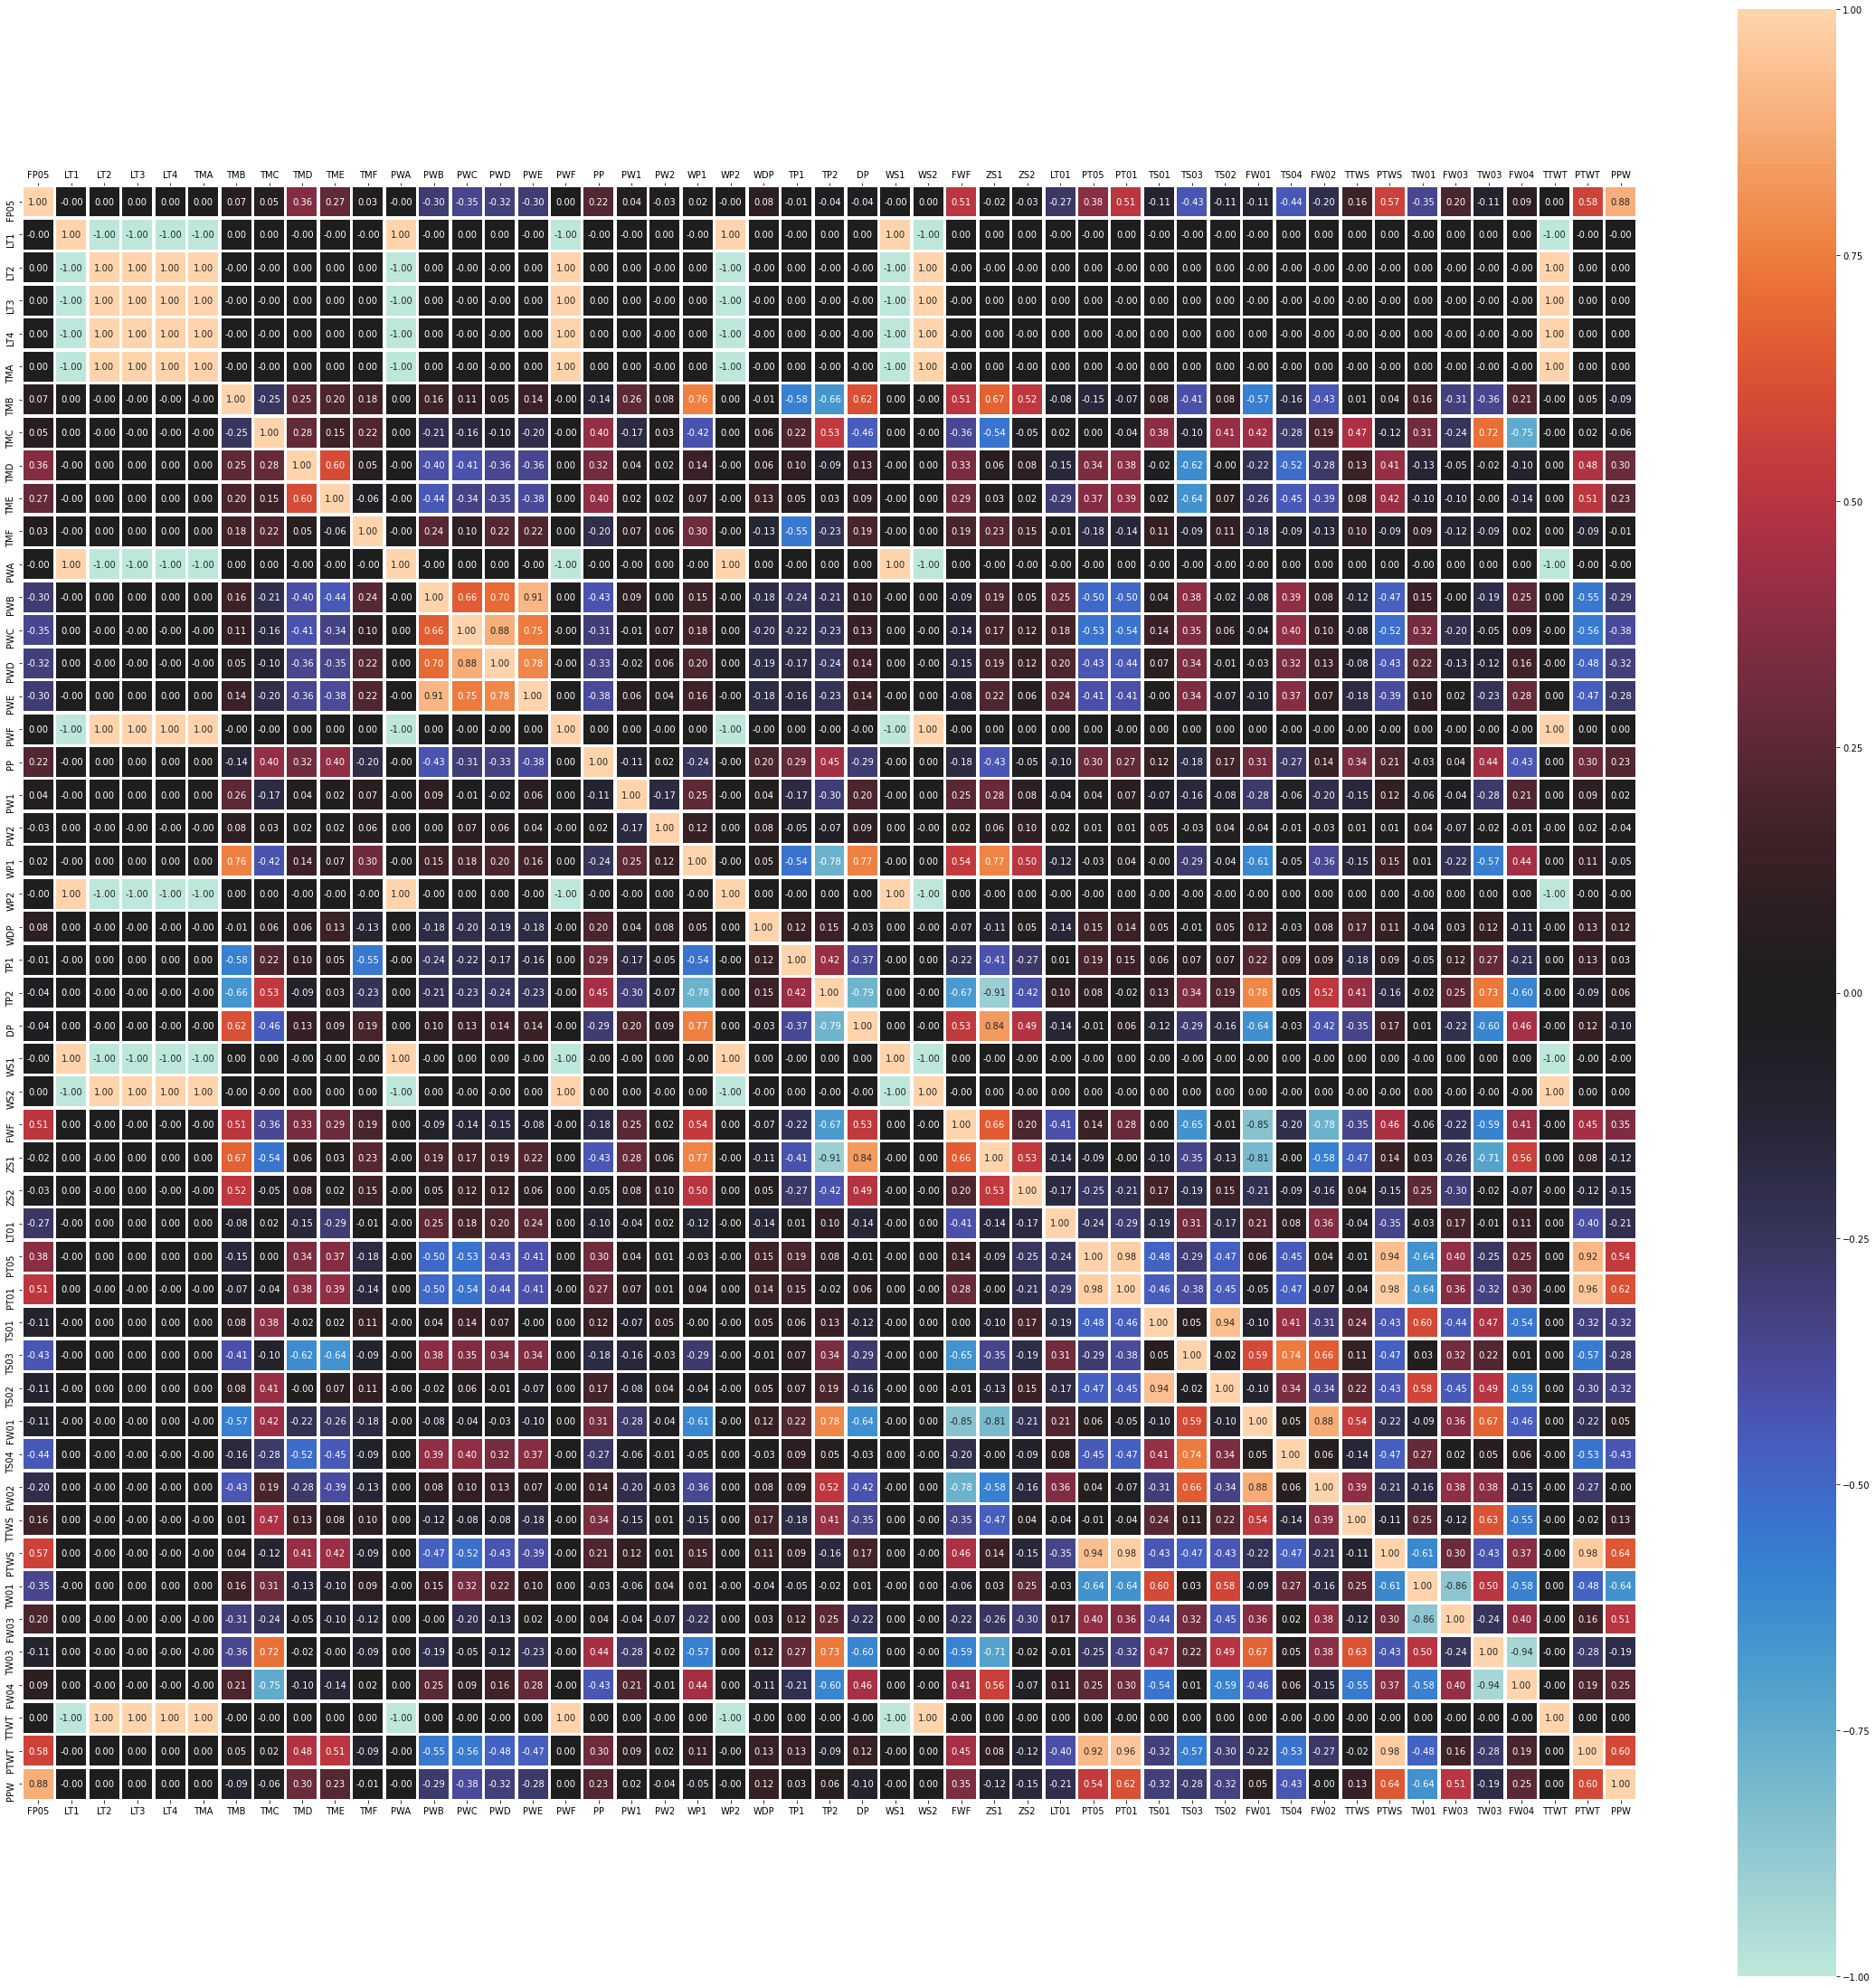

In [12]:
correlations = inputs.corr()
# correlations = correlations[modeledOutputs].drop(modeledOutputs, axis=0)
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(correlations, vmax=1.0, vmin=-1.0, center=0, fmt=".2f", square=True, linewidths=2.5, annot=True)
ax.tick_params(top=True, labeltop=True)
plt.show()

In [7]:
MIN_THRESHOLD = 0.3
MAX_THRESHOLD = 0.90

interestingRelations = dict()
for modeledOutput in modeledOutputs:
    interestingRelations[modeledOutput] = list()

for row in correlations.iterrows():
    inputName = row[0] 
    dataSeries = row[1]
    for item in dataSeries.iteritems():
        outputName = item[0]
        corr = item[1]
        if(abs(corr) > MIN_THRESHOLD and abs(corr) < MAX_THRESHOLD):
            interestingRelations[outputName].append((inputName, corr))

import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(interestingRelations)

{   'DP': [   ('TMB', 0.6200300311130689),
              ('TMC', -0.45989094020366633),
              ('WP1', 0.7651369661263968),
              ('TP1', -0.37052265700538434),
              ('TP2', -0.786544936287419),
              ('FWF', 0.5257506803321075),
              ('ZS1', 0.8350108634748425),
              ('ZS2', 0.4914449054212431),
              ('FW01', -0.6400395820959259),
              ('FW02', -0.417732450576661),
              ('TTWS', -0.346527600708374),
              ('TW03', -0.5957455818339177),
              ('FW04', 0.4582222325937522)],
    'LT01': [   ('FWF', -0.41235636105761964),
                ('TS03', 0.3095218948861659),
                ('FW02', 0.35504289177761694),
                ('PTWS', -0.3456301807760479),
                ('PTWT', -0.39891543052120504)]}


Text(0.5, 1.0, 'LT01')

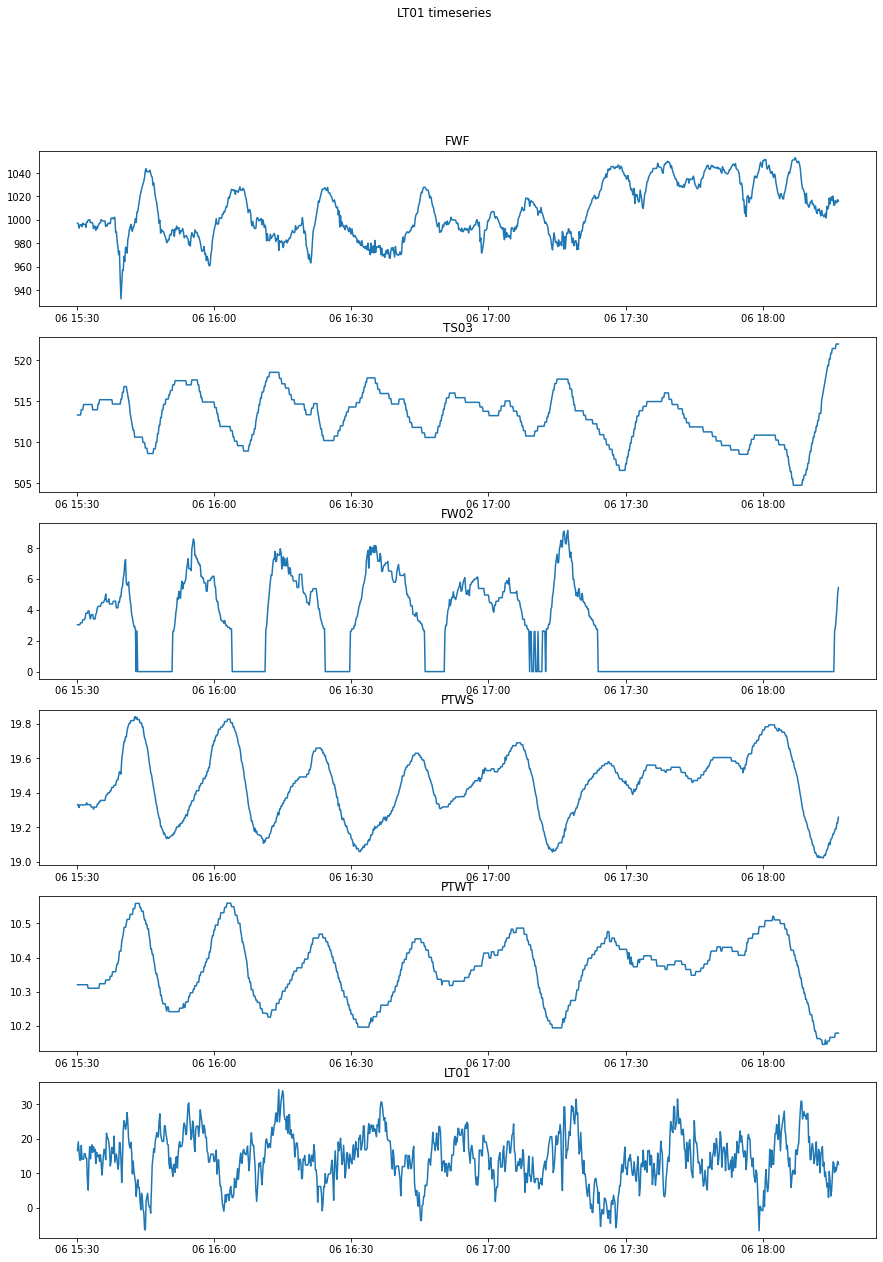

In [8]:
plt.rcParams['figure.figsize'] = [15, 20]
size = len(interestingRelations["LT01"])
fig, axs = plt.subplots(size+1)
fig.suptitle('LT01 timeseries')
for idx, val in enumerate(interestingRelations["LT01"]):
    axs[idx].plot(df["date"], df[val[0]])
    axs[idx].set_title(val[0])
    
axs[size].plot(df["date"], df["LT01"])
axs[size].set_title("LT01")

NameError: name 'signal' is not defined

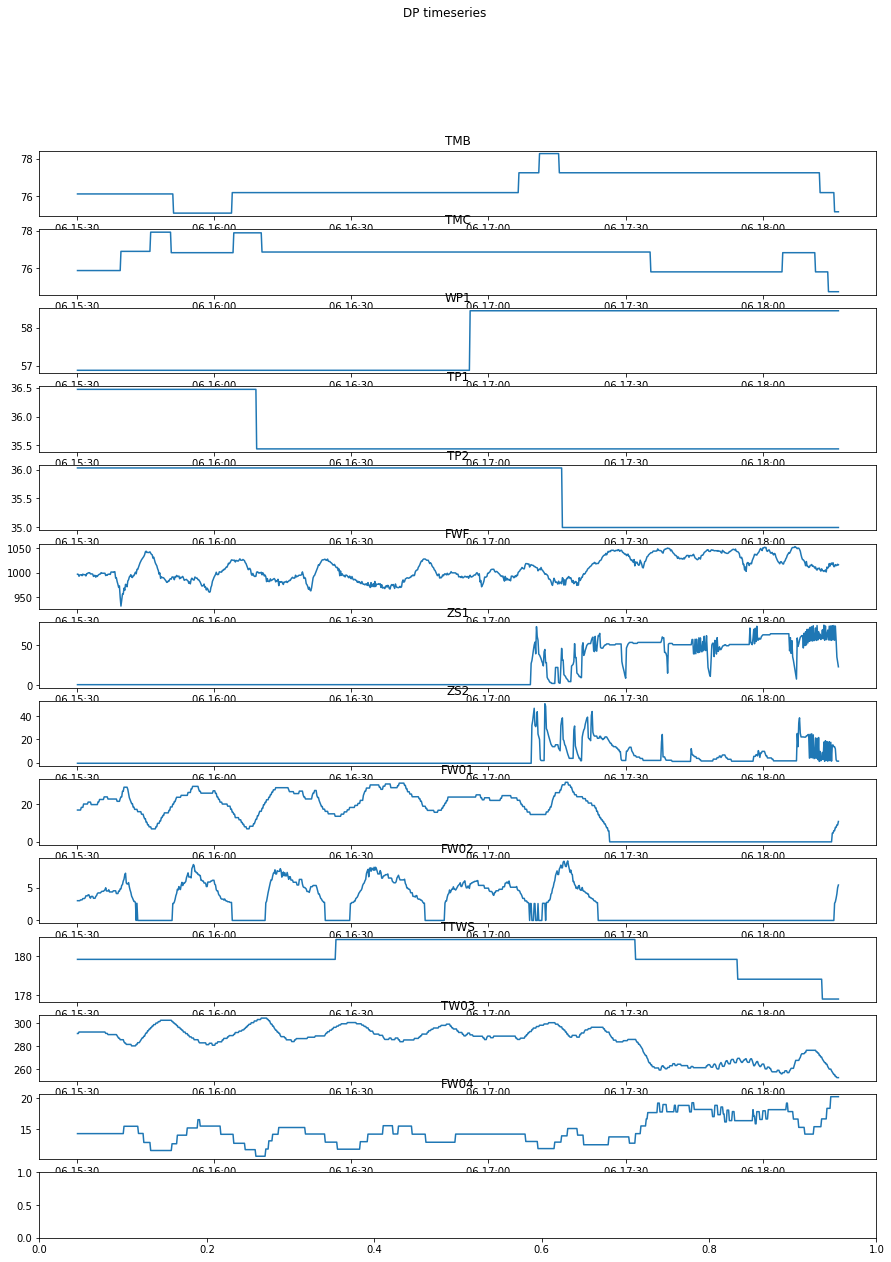

In [9]:
plt.rcParams['figure.figsize'] = [15, 20]
size = len(interestingRelations["DP"])
fig, axs = plt.subplots(size+1)
fig.suptitle('DP timeseries')
for idx, val in enumerate(interestingRelations["DP"]):
    axs[idx].plot(df["date"], df[val[0]])
    axs[idx].set_title(val[0])
    
axs[size].plot(df["date"], df["DP"])
axs[size].set_title("DP")

Text(0.5, 1.0, 'Corr')

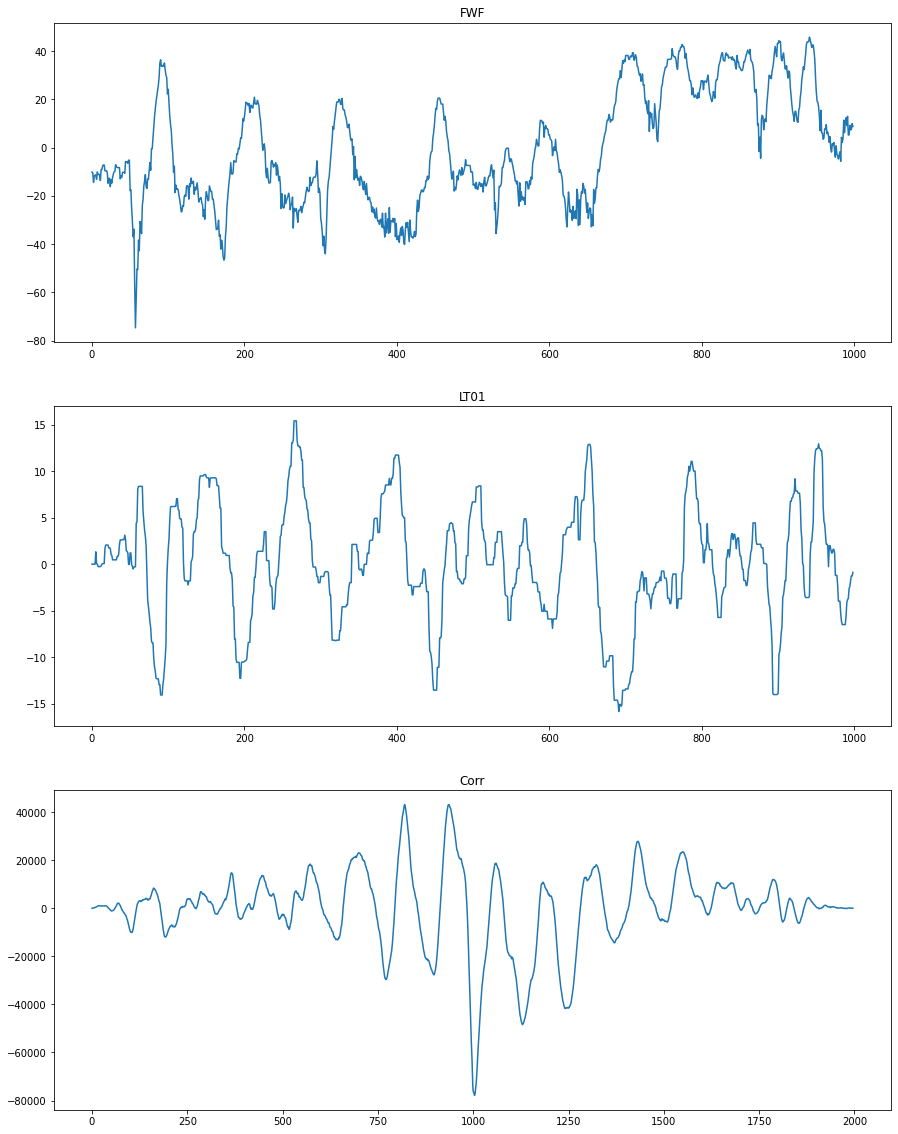

In [13]:
from scipy import signal
outputSignal = df["LT01"].to_numpy()
outputMean = np.mean(outputSignal)
outputSignal = outputSignal - outputMean

inputSignal = df["FWF"].to_numpy()
inputMean = np.mean(inputSignal)
inputSignal = inputSignal - inputMean

correlation = signal.correlate(inputSignal, outputSignal)

plt.rcParams['figure.figsize'] = [15, 20]
fig, axs = plt.subplots(3)

axs[0].plot(inputSignal)
axs[0].set_title("FWF")
axs[1].plot(signal.medfilt(outputSignal,11))
axs[1].set_title("LT01")
axs[2].plot(correlation)
axs[2].set_title("Corr")